<a href="https://colab.research.google.com/github/jproctor-rebecca/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/LS_DS_421_Text_Data_Assignment_RJProctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-10-26 19:32:55--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt.1’

requirements.txt.1  100%[===================>]     137  --.-KB/s    in 0s      

2020-10-26 19:32:55 (5.34 MB/s) - ‘requirements.txt.1’ saved [137/137]



In [2]:
!python -m spacy download en_core_web_lg  # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


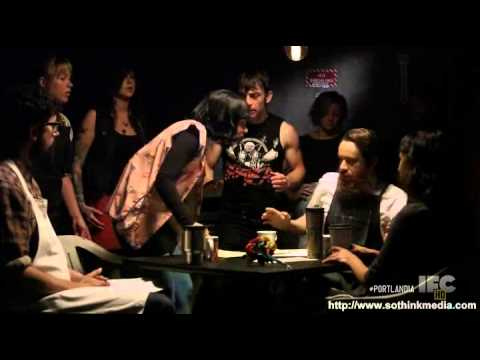

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [4]:
%pwd

'/content'

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [6]:
# Start here 
shops.shape

(7616, 3)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [7]:
# Get the unique values of column 
tokens_sr = shops['star_rating']
print(tokens_sr)

0        5.0 star rating 
1        4.0 star rating 
2        4.0 star rating 
3        2.0 star rating 
4        4.0 star rating 
              ...        
7611     4.0 star rating 
7612     5.0 star rating 
7613     4.0 star rating 
7614     3.0 star rating 
7615     4.0 star rating 
Name: star_rating, Length: 7616, dtype: object


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


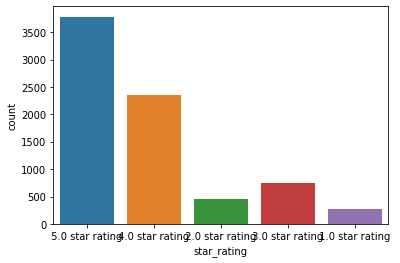

In [8]:
import seaborn as sns

sns.countplot(tokens_sr);

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [9]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
import en_core_web_lg
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = en_core_web_lg.load()

In [10]:
# count the raw text
shops['full_review_text'].value_counts(normalize=True)[:50]

 12/5/2016 This is such a cute little cafe! I've driven by this place many times and hadn't noticed it until today. Glad I stopped-the famous chicken waffle was delish!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [12]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [13]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops['tokens'].head

<bound method NDFrame.head of 0       [11252016, 1, checkin, love, love, loved, the,...
1       [1222016, listed, in, date, night, austin, amb...
2       [11302016, 1, checkin, listed, in, brunch, spo...
3       [11252016, very, cool, decor, good, drinks, ni...
4       [1232016, 1, checkin, they, are, located, with...
                              ...                        
7611    [2192015, i, actually, step, into, this, resta...
7612    [1212016, ok, the, steeping, room, is, awesome...
7613    [4302015, loved, coming, here, for, tea, and, ...
7614    [822015, the, food, is, just, average, the, bo...
7615    [5232015, i, finally, stopped, in, for, lunch,...
Name: tokens, Length: 7616, dtype: object>

In [14]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[11252016, 1, checkin, love, love, loved, the,..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[1222016, listed, in, date, night, austin, amb..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[11252016, very, cool, decor, good, drinks, ni..."
4,12/3/2016 1 check-in They are located within ...,"[1232016, 1, checkin, they, are, located, with..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"[11202016, 1, checkin, very, cute, cafe, i, th..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","[10272016, 2, checkins, listed, in, nuptial, c..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"[1122016, 2, checkins, love, this, place, 5, s..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","[10252016, 1, checkin, ok, lets, try, this, ap..."
9,11/10/2016 3 check-ins This place has been sh...,"[11102016, 3, checkins, this, place, has, been..."


In [15]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = en_core_web_lg.load()

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [16]:
len(tokenizer.vocab)


1340242

In [22]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [23]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
# iterate through documents inheriting from documents
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops['tokens'].head()

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    [ , 11/25/2016, Very, cool, decor!, Good, drin...
4    [ , 12/3/2016, 1, check-in, They, are, located...
Name: tokens, dtype: object

In [25]:
# word count
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
65,the,6520,27779,1.0,0.034334,0.034334,0.856092
6,and,6804,25748,2.0,0.031824,0.066157,0.893382
61,,7616,22606,3.0,0.027940,0.094097,1.000000
13,a,6181,22085,4.0,0.027296,0.121394,0.811581
3,I,5469,19780,5.0,0.024447,0.145841,0.718093


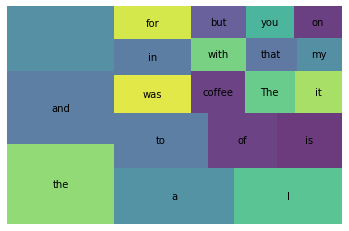

In [26]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [27]:
list(shops)

['coffee_shop_name', 'full_review_text', 'star_rating', 'tokens']

In [32]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops['tokens'].head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

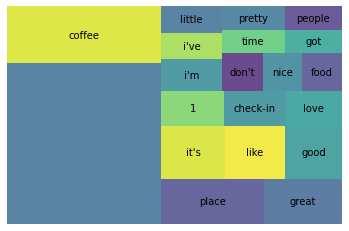

In [34]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
# extend stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee','i\'m', 'i\'ve', ' ', 'it', "it's", 'it.', 'the', 'this', '-', '1'])
STOP_WORDS

In [66]:
tokens = []
corpus_tokens = []
# returns document for each review with added functionality
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    # call on document with added functionality
    for token in doc: 
        # add extended stop words
        if token.text.lower() not in STOP_WORDS:
            # compare apples with apples by making all lower case
            doc_tokens.append(token.text.lower())
          
    corpus_tokens.append(doc_tokens)
   
    #tokens.append(doc_tokens)
    
shops['tokens'] = corpus_tokens
shops['tokens'].head()
#corpus_tokens

0    [11/25/2016, check-in, love, love, loved, atmo...
1    [12/2/2016, listed, date, night:, austin,, amb...
2    [11/30/2016, check-in, listed, brunch, spots, ...
3    [11/25/2016, cool, decor!, good, drinks, nice,...
4    [12/3/2016, check-in, located, northcross, mal...
Name: tokens, dtype: object

In [67]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check-in, listed, brunch, spots, ..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check-in, located, northcross, mal..."


In [43]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
138,place,3029,4264,1.0,0.011110,0.011110,0.397715
133,great,2438,3250,2.0,0.008468,0.019578,0.320116
163,like,2034,2902,3.0,0.007561,0.027139,0.267069
161,good,2084,2779,4.0,0.007241,0.034380,0.273634
7,check-in,1957,1961,5.0,0.005109,0.039489,0.256959


In [60]:
wc.shape

(40482, 7)

In [64]:
wc.head(30)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
138,place,3029,4264,1.0,0.011110,0.011110,0.397715
133,great,2438,3250,2.0,0.008468,0.019578,0.320116
163,like,2034,2902,3.0,0.007561,0.027139,0.267069
161,good,2084,2779,4.0,0.007241,0.034380,0.273634
7,check-in,1957,1961,5.0,0.005109,0.039489,0.256959
34,love,1434,1806,6.0,0.004706,0.044195,0.188288
799,little,1230,1479,7.0,0.003854,0.048048,0.161502
377,don't,1133,1395,8.0,0.003635,0.051683,0.148766
160,nice,1188,1368,9.0,0.003564,0.055247,0.155987
405,food,1092,1363,10.0,0.003551,0.058798,0.143382


In [62]:
wc['rank'].value_counts()

19975.0    1
30534.0    1
34131.0    1
30067.0    1
28574.0    1
          ..
15484.0    1
12900.0    1
10094.0    1
2491.0     1
1.0        1
Name: rank, Length: 40482, dtype: int64

In [ ]:
# ranks 4-5 then groupy by % 
wc_good = 

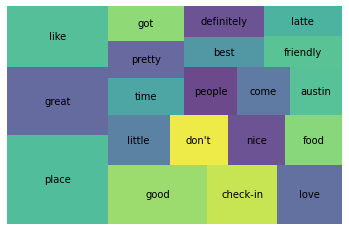

In [44]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [46]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

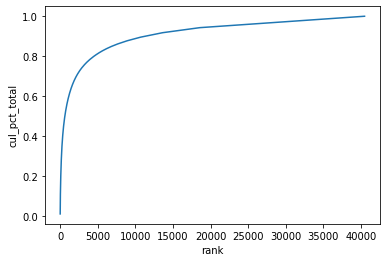

In [47]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [48]:
wc.shape

(40482, 7)

In [68]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        # filtering methods
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            # we could apply regex to filter out edge case tokens
            lemmas.append(token.lemma_)
    
    return lemmas

# # Wrap it in a function
# def get_lemmas(text):
#     lemmas = []
#     doc = nlp(text)
#     for token in doc:
#         if (token.is_stop == False) & (token.is_punct == False) & (token.is_space == False) & (token.pos_ != 'PRON'):
#             lemmas.append(token.lemma_)
#     return lemmas

In [71]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo...","[ , 11/25/2016, 1, check, Love, love, love, at..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...","[ , 12/2/2016, list, Date, Night, Austin, Ambi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check-in, listed, brunch, spots, ...","[ , 11/30/2016, 1, check, list, Brunch, Spots,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,...","[ , 11/25/2016, cool, decor, good, drink, nice..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check-in, located, northcross, mal...","[ , 12/3/2016, 1, check, locate, Northcross, m..."


In [ ]:
# # This is a lot, let's break it up. --See Section Below
# df2 = corpus_a['lemmas'].apply(pd.Series) \
#     .merge(corpus_a, right_index=True, left_index = True) \
#     .drop('lemmas', axis=1) \
#     .melt(id_vars = ['Label'], value_name = 'lemma')
# df2.head()

In [84]:
dfa = shops['lemmas'].apply(pd.Series) \
  .merge(shops, right_index = True, left_index = True) \
  .drop(['lemmas'], axis=1) \
  .melt(id_vars = ['star_rating'], value_name = 'lemmas')

dfa.head()


,star_rating,variable,lemmas
0,5.0 star rating,0,
1,4.0 star rating,0,
2,4.0 star rating,0,
3,2.0 star rating,0,
4,4.0 star rating,0,


In [93]:
dfa2 = dfa.dropna(axis=0)
dfa2.head(50)

,star_rating,variable,lemmas
0,5.0 star rating,0,
1,4.0 star rating,0,
2,4.0 star rating,0,
3,2.0 star rating,0,
4,4.0 star rating,0,
5,4.0 star rating,0,
6,4.0 star rating,0,
7,5.0 star rating,0,
8,3.0 star rating,0,
9,5.0 star rating,0,


In [87]:
dfa2 = dfa2.groupby('lemmas').mean()
dfa2

DataError: ignored

In [ ]:
df2.describe()


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

